In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV subido
df = pd.read_csv("housing.csv")
#del df['ocean_proximity']
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

nombres_limpios = [col.replace('<', '').replace('>', '').replace('[', '').replace(']', '') for col in X.columns]
X.columns = nombres_limpios


### Escalar datos y hacer PCA

In [2]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [11]:
# Obten el objeto de PCA
objeto_pca = pipeline.named_steps['pca']

In [12]:
len(X.keys())

13

In [13]:
X_pca = pipeline.transform(X)
x_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
x_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.375111,1.858058,-2.789762,0.099758,1.382388,0.373647,1.788786,-0.024894,0.175938,-0.250550,0.145763,-0.067212,8.924183e-16
1,2.617723,2.714887,-2.781672,0.104062,1.572170,0.445566,1.594817,-0.484008,-0.354827,0.039535,-0.027019,0.266951,-1.105983e-15
2,-2.257997,1.938945,-2.938880,0.216968,0.472146,0.173484,1.796909,0.459729,0.099150,-0.033039,0.104118,-0.048443,5.593514e-16
3,-2.210764,2.030104,-2.689386,0.237120,-0.216221,0.005836,1.503468,0.155376,0.056837,-0.034649,0.077560,-0.038663,3.373068e-16
4,-2.073292,2.149514,-2.420998,0.262479,-0.953494,-0.171632,1.202670,-0.152623,-0.101422,0.177669,0.009693,0.009757,-3.288270e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.154527,2.099671,1.584531,-0.564314,-0.335252,-0.097306,-0.718325,0.055053,-0.122448,0.099142,0.395915,0.137862,1.225485e-15
20636,-1.961548,1.937474,1.691384,-0.673679,0.509235,0.085962,-0.694854,-0.281484,-0.018039,0.067396,0.374592,0.090721,1.225485e-15
20637,-0.559456,2.212189,1.701540,-0.615767,-0.011015,-0.025403,-0.828813,-0.308924,-0.200370,0.077075,0.320970,0.138308,6.703737e-16
20638,-0.969095,2.162271,1.677224,-0.624498,0.084631,-0.005064,-0.808155,-0.270878,-0.238012,0.069520,0.294299,0.108453,6.703737e-16


Text(0, 0.5, 'Componente 2')

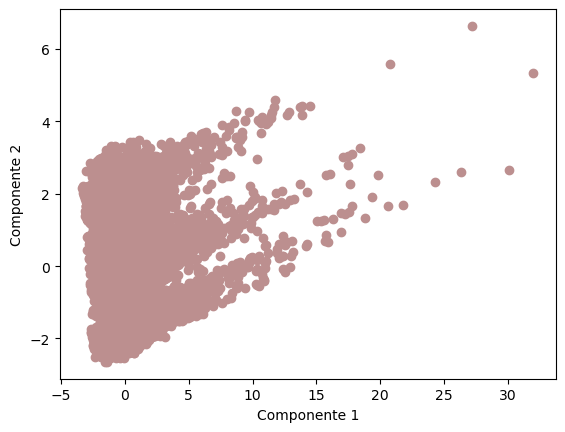

In [16]:
plt.scatter(x_components['PC1'], x_components['PC2'], color = "rosybrown")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

### Varianza explicada

Si la primera componente principal se obtiene con el eigenvalor que máximiza la varianza.

La varianza explicada por cada componente principal 

$$varianza_i = \frac{Eigenvalor_i}{\Sigma{Eigenvalores}}$$


In [17]:
objeto_pca.explained_variance_ratio_[0]

0.3015428987769536

In [18]:
objeto_pca.explained_variance_ratio_[1]

0.19738656527320123

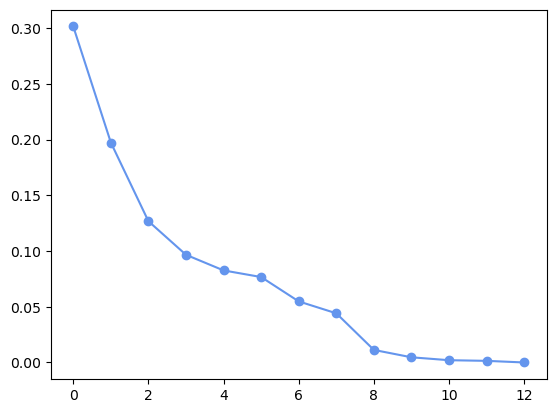

In [24]:
plt.plot(objeto_pca.explained_variance_ratio_, marker = "o", color = "cornflowerblue")

### Entendiendo primera componente

In [31]:
objeto_pca.explained_variance_ratio_[0]

0.3015428987769536

In [28]:
componente1 = pd.DataFrame({
    'features': X.keys(),
    'pesos': objeto_pca.components_[0]
})
componente1

,features,pesos
0,longitude,0.101538
1,latitude,-0.099569
2,housing_median_age,-0.220563
3,total_rooms,0.478316
4,total_bedrooms,0.484269
5,population,0.469222
6,households,0.486598
7,median_income,0.048330
8,ocean_proximity_1H OCEAN,0.057847
9,ocean_proximity_INLAND,-0.012784


### Entendiendo segunda componente

In [32]:
objeto_pca.explained_variance_ratio_[1]

0.19738656527320123

In [29]:
componente2 = pd.DataFrame({
    'features': X.keys(),
    'pesos': objeto_pca.components_[1]
})
componente2

,features,pesos
0,longitude,-0.515239
1,latitude,0.563595
2,housing_median_age,-0.026872
3,total_rooms,0.100905
4,total_bedrooms,0.090788
5,population,0.052088
6,households,0.085387
7,median_income,-0.088896
8,ocean_proximity_1H OCEAN,-0.435594
9,ocean_proximity_INLAND,0.290002


In [33]:
objeto_pca.explained_variance_ratio_[2]

0.12677064272661795

### Obtener las componentes principales

pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [114]:

# Transformar los datos

# Crear DataFrame con nombres de columnas


### Visualizar componentes principales

## Modelos de datos

### Primero con todos los features

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model = XGBRegressor().fit(X,y)
predicciones = model.predict(X)
r2_score(y_pred=predicciones, y_true=y)

0.9326267577509099

### Ahora con las componentes principales

In [36]:
x_pc12 = x_components[['PC1', 'PC2']]

model = XGBRegressor().fit(x_pc12,y)
predicciones = model.predict(x_pc12)
r2_score(y_pred=predicciones, y_true=y)

0.3401837086574726

### Ahora solo con las primeras 3 componentes

In [37]:
x_pc12 = x_components[['PC1', 'PC2', 'PC3', 'PC4']]

model = XGBRegressor().fit(x_pc12,y)
predicciones = model.predict(x_pc12)
r2_score(y_pred=predicciones, y_true=y)

0.7994365384895754

In [41]:
model = XGBRegressor().fit(x_components,y)
predicciones = model.predict(x_components)
r2_score(y_pred=predicciones, y_true=y)

0.9184647549364162

In [45]:
importancias = pd.DataFrame({
    'features': x_components.keys(),
    'importancia': model.feature_importances_
})
importancias

,features,importancia
0,PC1,0.011157
1,PC2,0.019141
2,PC3,0.294573
3,PC4,0.033921
4,PC5,0.033689
5,PC6,0.291009
6,PC7,0.077564
7,PC8,0.082983
8,PC9,0.061114
9,PC10,0.031381


In [46]:
x_pc12 = x_components[['PC3', 'PC6', 'PC13']]

model = XGBRegressor().fit(x_pc12, y)
predicciones = model.predict(x_pc12)
r2_score(y_pred=predicciones, y_true=y)

0.740361654201307

### Conclusión: a medida que agregamos más componentes aumenta el poder predictivo pero se pierde el objetivo inicial que es tener menos dimensiones

### Clustering + PCA

In [47]:
from sklearn.cluster import KMeans




In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters = 2))
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=2))])

In [51]:
x_components['cluster'] = pipeline.predict(X) + 1

Text(0, 0.5, 'Componente 2')

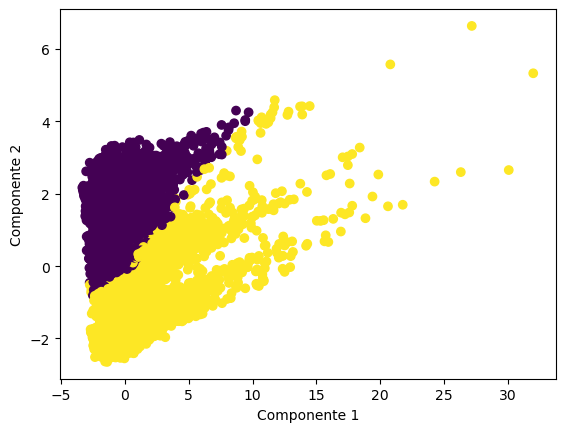

In [54]:
plt.scatter(x_components['PC1'], x_components['PC2'], c = x_components['cluster'])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")